scikit-learnのdigitsを使ってニューラルネットを学ぶ

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pylab as plt
%matplotlib inline

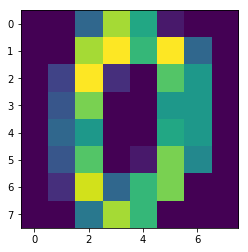

In [2]:
# digitsを読み込み中身を確認してみる
digits = load_digits()
plt.imshow(digits.images[0])

In [3]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

### Q1:One Hot表現とは何か？

In [5]:
# onehot表現でdigitsのデータを表す
onehot_target = pd.get_dummies(digits.target)

In [6]:
onehot_target

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1


In [7]:
# 全てのデータを学習データと訓練データに分割する
x_train, x_val, y_train, y_val = train_test_split(digits.data, onehot_target, test_size=0.1, random_state=20)

## 活性化関数

多層ニューラルネットでは、非線形の関係になってるデータにうまく近似するためにニューラルネットの各層に置いて非線形変換を行う。
非線形変換を行う関数のことを活性化関数と呼ぶ。

- シグモイド関数

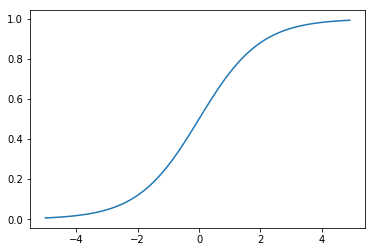

In [9]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

- 正規化線形関数(ReLU関数)

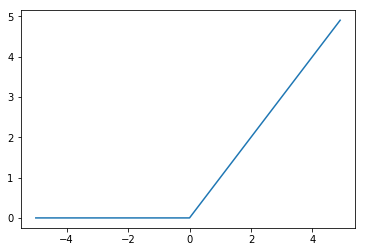

In [11]:
def ReLU(s):
    return np.maximum(0, s)

x = np.arange(-5, 5, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.show()

### Q 2: 近年シグモイド関数の代わりにReLU関数が使われることが多い.ReLU関数の優れている点を述べよ.